# Image Classification Example
## Deep Model
### Amir 2022

In [1]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import os
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
pd.options.display.max_colwidth = 100
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(42)
warnings.filterwarnings('ignore')
IMG_SIZE = 150
SEED = 42

In [4]:
fnams = pd.read_csv('1233.csv')
fnams 

,images,tags,y1,y2,y3
0,00000.066834_30.png,1,1,0,0
1,00040.29499_30.png,1,1,0,0
2,0034082_20220209_carry_18750.57364_100.png,1,1,0,0
3,0034082_20220209_carry_18750.57364_200.png,1,1,0,0
4,0034082_20220209_carry_20010.65491_100.png,1,1,0,0
...,...,...,...,...,...
4934,threat_new_4_15fps0.72063_100.png,3,0,0,1
4935,threat_new_4_15fps0.72063_30.png,3,0,0,1
4936,vlc-record-2022-09-04-23h02m05s-videoplayback (4)0.15677_200.png,3,0,0,1
4937,vlc-record-2022-09-04-23h15m25s-videoplayback (2)0.46951_100.png,3,0,0,1


In [5]:
fnams.columns

Index(['images', 'tags', 'y1', 'y2', 'y3'], dtype='object')

In [6]:
fnams.loc[:, 'images']

0                                                    00000.066834_30.png  
1                                                     00040.29499_30.png  
2                             0034082_20220209_carry_18750.57364_100.png  
3                             0034082_20220209_carry_18750.57364_200.png  
4                             0034082_20220209_carry_20010.65491_100.png  
                                       ...                                
4934                                   threat_new_4_15fps0.72063_100.png  
4935                                    threat_new_4_15fps0.72063_30.png  
4936    vlc-record-2022-09-04-23h02m05s-videoplayback (4)0.15677_200.png  
4937    vlc-record-2022-09-04-23h15m25s-videoplayback (2)0.46951_100.png  
4938    vlc-record-2022-09-04-23h15m25s-videoplayback (2)0.46951_200.png  
Name: images, Length: 4939, dtype: object

In [7]:
'''
path = 'cs4243_smallest_1set'
#List of image:
img_list = list(fnams['images'])
data_img = []
for each in img_list:
               #Each image path:
               each_path = os.path.join(path, each)
               data_img.append(each_path)
# Converting list to numpy array
X = np.array(data_img) 
'''

"\npath = 'cs4243_smallest_1set'\n#List of image:\nimg_list = list(fnams['images'])\ndata_img = []\nfor each in img_list:\n               #Each image path:\n               each_path = os.path.join(path, each)\n               data_img.append(each_path)\n# Converting list to numpy array\nX = np.array(data_img) \n"

In [8]:
path = 'cs4243_smallest_1set'
#List of image:
img_list = list(fnams['images'])
data_img = []
for each in img_list:
               #Each image path:
               each_path = os.path.join(path, each)
               #Read each image:
               each_img = cv2.imread(each_path)
               #OpenCv default color is BGR. Convert it to RGB:
               each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
               #Resize the images:
               each_img_resized = cv2.resize(each_img, (512,512))
               #Save arrays to a list:
               data_img.append(each_img_resized)
# Converting list to numpy array
X = np.array(data_img)

In [9]:
#y = OneHotEncoder(dtype='int8').fit_transform(fnams['tags'].values.reshape(-1,1))
#print('Shape of X and y: ', X.shape , y.shape)

In [10]:
y = fnams.loc[:, ('y1','y2','y3')]
print('Shape of X and y: ', X.shape , y.shape)

Shape of X and y:  (4939, 512, 512, 3) (4939, 3)


In [11]:
y = np.array(y)

In [12]:
np.save('savedX512', X)
np.save('savedy512' , y)

In [13]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (3358, 512, 512, 3)
y_train shape:  (3358, 3)
X_val shape  :  (840, 512, 512, 3)
y_val shape  :  (840, 3)
X_test shape :  (741, 512, 512, 3)
y_test shape :  (741, 3)


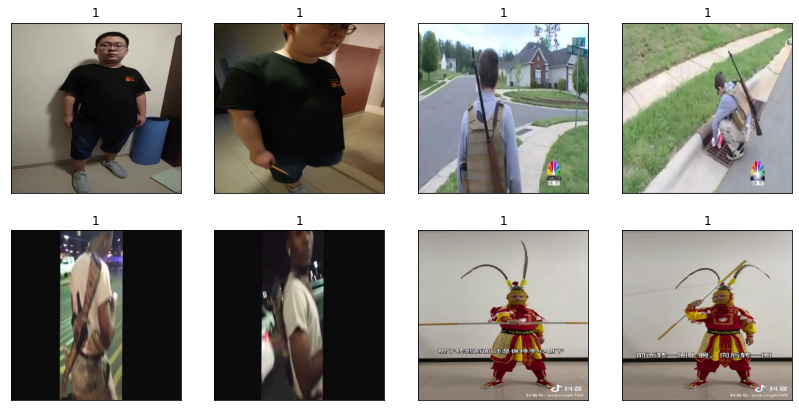

In [14]:
plt.figure(figsize=(14,7))
for each in range(8):
    plt.subplot(2,4,each+1)
    plt.imshow(X[each])
    plt.title(fnams['tags'].loc[each])
    plt.xticks([])
    plt.yticks([])

In [15]:
train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)
validation_gen = ImageDataGenerator(horizontal_flip=True,
                                    rotation_range = 45,
                                    zoom_range=0.2,
                                    height_shift_range = 0.5,
                                    width_shift_range = 0.5)
train_gen.fit(X_train)
validation_gen.fit(X_val)

In [16]:
#Note that you can decrease batch size and increase number of epochs if you want to maximise your model accuracy:
batch_size = 16
epochs = 3

#Now we define Xception, our pre-trained model:

base = Xception(include_top=False, 
                weights='imagenet', 
                input_shape=(512,512,3))
x = base.output
x = GlobalAveragePooling2D()(x)


In [17]:
# We also define the entry (or head) of the model, and we combine base and head:

#We use 3, because we have 6 categories:
head = Dense(3, activation='softmax')(x)
model = Model(inputs=base.input, outputs=head)

# We compile the model with the following arguments (note that you can use more arguments in the function, just check here):

model.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)


In [18]:
#If you want to see the model summary, or even plot a model schema, you can use the functions presented below.

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 255, 255, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [19]:
'''tf.keras.utils.plot_model(
            model,
            to_file="model.png",
            show_shapes=False,
            show_dtype=False,
            show_layer_names=True,
            rankdir="TB",
            expand_nested=False,
            dpi=96,
            layer_range=None,
)'''

'tf.keras.utils.plot_model(\n            model,\n            to_file="model.png",\n            show_shapes=False,\n            show_dtype=False,\n            show_layer_names=True,\n            rankdir="TB",\n            expand_nested=False,\n            dpi=96,\n            layer_range=None,\n)'

In [20]:
history = model.fit_generator(
               train_gen.flow(X_train, y_train,
               batch_size=batch_size),
               epochs = epochs,
               validation_data = validation_gen.flow(X_val, y_val)
)

Epoch 1/3
  5/210 [..............................] - ETA: 2:04:42 - loss: 1.1067 - accuracy: 0.3000

KeyboardInterrupt: 

In [ ]:
#model.fit( X_train, y_train, batch_size= batch_size, epochs = epochs)

In [ ]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();


In [ ]:
# Predicting labels from X_test data
y_pred = model.predict(X_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test_classes, y_pred_classes))
test_loss = model.evaluate(X_test, y_test)


In [ ]:
test_loss = model.evaluate(X_val, y_val)

In [ ]:
test_loss = model.evaluate(X_val, y_val)

In [ ]:
confusion_matrix(y_test_classes, y_pred_classes)